In [1]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt


# Load the dataset
file_path = 'Final_data_file.csv'  # Update the path accordingly
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP
0,1970,7.62,41.65,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
1,1971,7.72,39.85,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


In [8]:
for column in data.columns:
    if column != 'Year' and column != 'Ireland_Public_Debt_Pc_of_GDP':
        data[f'{column}_lag1'] = data[column].shift(1)
data = data.dropna()
data.head()

,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP,...,Ireland_Public_Debt_Pc_of_GDP_lag1,Denmark_Public_Debt_Pc_of_GDP_lag1_lag1,United Kingdom_Public_Debt_Pc_of_GDP_lag1_lag1,Denmark_Inflation_lag1_lag1,United Kingdom_Inflation_lag1_lag1,Ireland_Inflation_lag1_lag1,Denmark_GDP_lag1_lag1,United Kingdom_GDP_lag1_lag1,Ireland_GDP_lag1_lag1,Ireland_Public_Debt_Pc_of_GDP_lag1_lag1
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808,...,39.85,7.62,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886,41.65
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428,...,37.34,7.72,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886,39.85
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231,...,35.09,6.64,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808,37.34
5,1975,4.26,48.34,46.68,9.605612,24.207288,20.875850,-1.456645,-1.473649,5.656645,...,43.45,5.85,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428,35.09
6,1976,4.49,51.70,48.88,9.010291,16.559523,17.985696,5.924606,2.910266,1.394808,...,48.34,5.08,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231,43.45


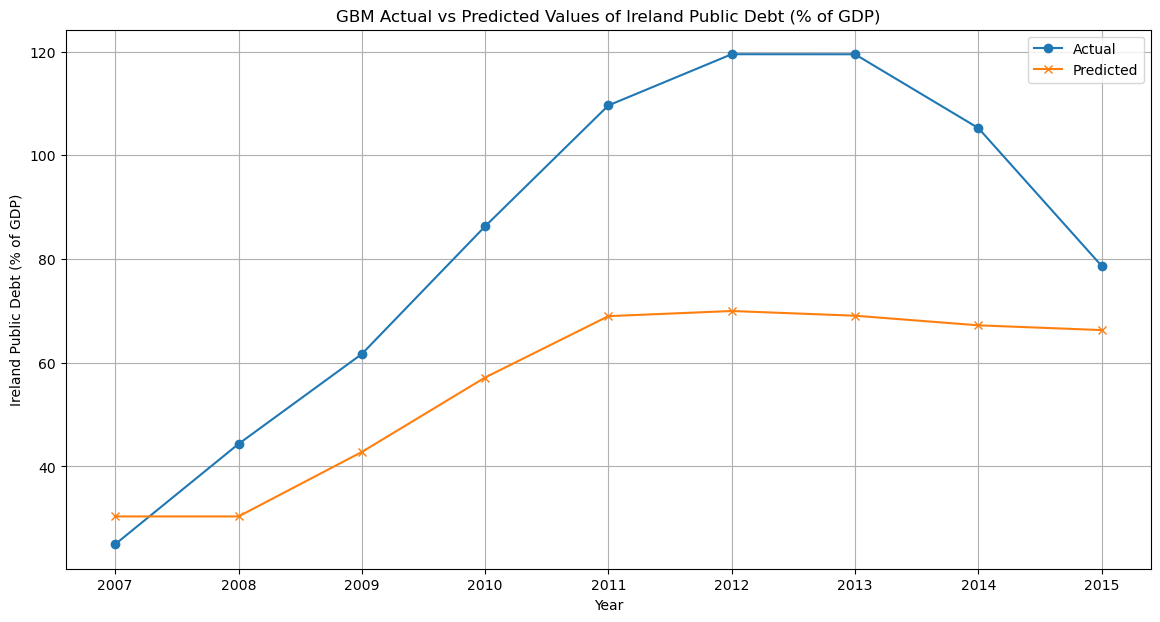

(1074.7062892711842, 32.78271326890415)

In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Preparing independent variables (all other variables + lagged feature) and the dependent variable
X = data.drop(['Year', 'Ireland_Public_Debt_Pc_of_GDP'], axis=1)
y = data['Ireland_Public_Debt_Pc_of_GDP']

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm.fit(X_train, y_train)

# Predicting on the test set
y_pred = gbm.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
test_years = data['Year'][-len(y_test):]  # Extracting the years corresponding to the test set
plt.plot(test_years, y_test, label='Actual', marker='o')
plt.plot(test_years, y_pred, label='Predicted', marker='x')
plt.title('GBM Actual vs Predicted Values of Ireland Public Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Ireland Public Debt (% of GDP)')
plt.legend()
plt.grid(True)
plt.show()

mse, rmse

In [10]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GBM model
gbm = GradientBoostingRegressor(random_state=42)

# RandomizedSearchCV setup
gbm_random = RandomizedSearchCV(estimator=gbm, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
gbm_random.fit(X_train, y_train)

# Best parameters found
best_params = gbm_random.best_params_
print("Best parameters found: ", best_params)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.2}


In [11]:
data = pd.read_csv(file_path)
for column in data.columns:
    if column != 'Year' and column != 'Ireland_Public_Debt_Pc_of_GDP':
        data[f'{column}_lag1'] = data[column].shift(1)
data = data.dropna()
data.head()

,Year,Denmark_Public_Debt_Pc_of_GDP,Ireland_Public_Debt_Pc_of_GDP,United Kingdom_Public_Debt_Pc_of_GDP,Denmark_Inflation,United Kingdom_Inflation,Ireland_Inflation,Denmark_GDP,United Kingdom_GDP,Ireland_GDP,Denmark_Public_Debt_Pc_of_GDP_lag1,United Kingdom_Public_Debt_Pc_of_GDP_lag1,Denmark_Inflation_lag1,United Kingdom_Inflation_lag1,Ireland_Inflation_lag1,Denmark_GDP_lag1,United Kingdom_GDP_lag1,Ireland_GDP_lag1
1,1971,7.72,39.85,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886,7.62,73.24,6.514841,6.366568,8.207190,1.596842,4.308886,3.469886
2,1972,6.64,37.34,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808,7.72,65.55,5.869870,9.444837,8.961749,3.004996,3.504717,3.469886
3,1973,5.85,35.09,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428,6.64,62.04,6.562361,7.071098,8.605817,3.929385,4.321668,6.489808
4,1974,5.08,43.45,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231,5.85,54.56,9.303383,9.196033,11.414850,4.092946,6.523848,4.721428
5,1975,4.26,48.34,46.68,9.605612,24.207288,20.875850,-1.456645,-1.473649,5.656645,5.08,51.60,15.275206,16.044011,16.976127,-1.122394,-2.484404,4.260231


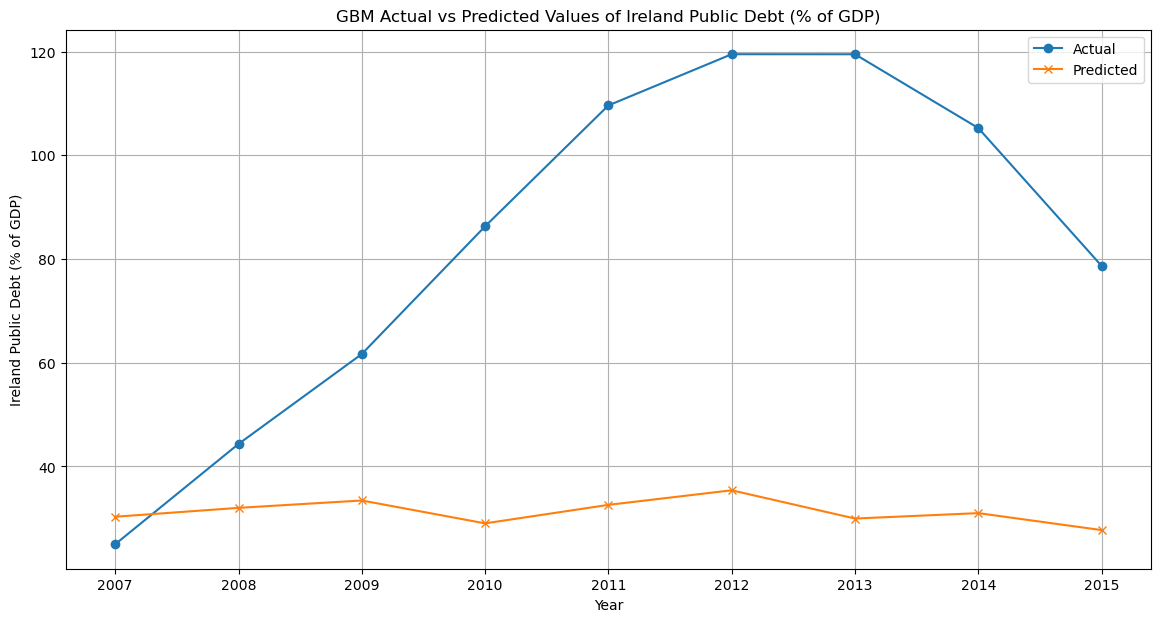

(3708.436680332773, 60.89693490096832)

In [12]:
# Preparing independent variables (all other variables + lagged feature) and the dependent variable
X = data.drop(['Year', 'Ireland_Public_Debt_Pc_of_GDP'], axis=1)
y = data['Ireland_Public_Debt_Pc_of_GDP']

# Splitting the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Training the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(n_estimators=200, random_state=42,min_samples_split=5, min_samples_leaf=2, max_depth=4, learning_rate=0.2 )
gbm.fit(X_train, y_train)

# Predicting on the test set
y_pred = gbm.predict(X_test)

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Plotting the actual vs predicted values
plt.figure(figsize=(14, 7))
test_years = data['Year'][-len(y_test):]  # Extracting the years corresponding to the test set
plt.plot(test_years, y_test, label='Actual', marker='o')
plt.plot(test_years, y_pred, label='Predicted', marker='x')
plt.title('GBM Actual vs Predicted Values of Ireland Public Debt (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Ireland Public Debt (% of GDP)')
plt.legend()
plt.grid(True)
plt.show()

mse, rmse